[147.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 53.0, 391.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0, 444.0]


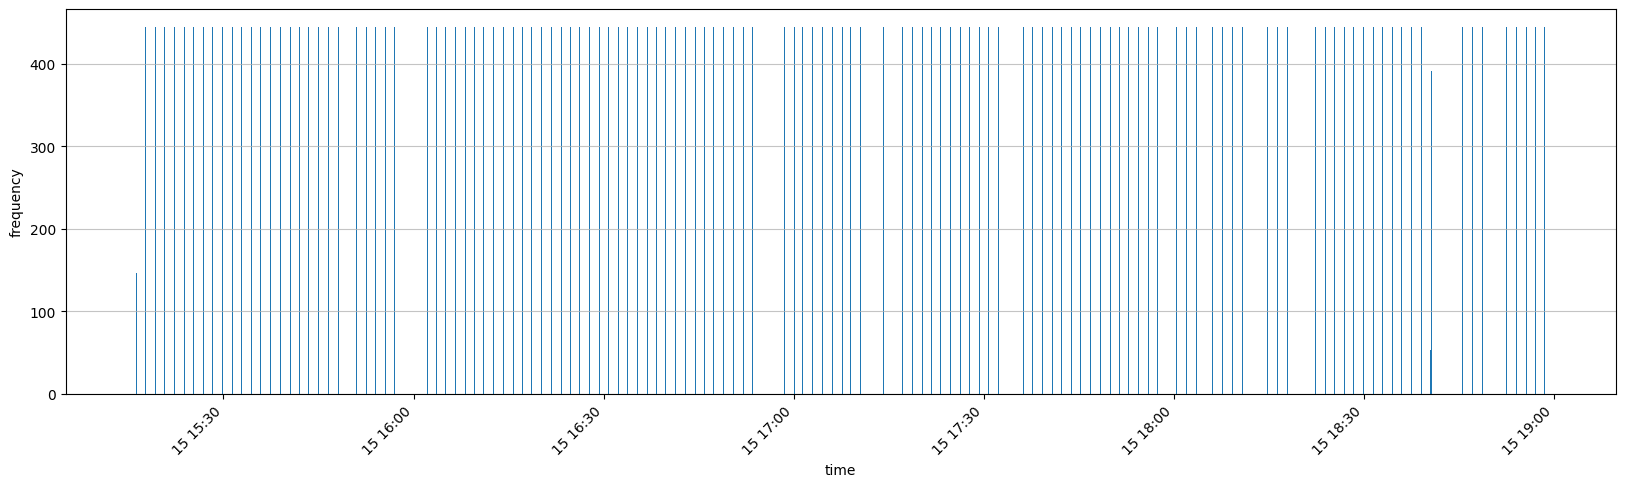

In [62]:
#! Histogram of times from a log

import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import re


logfile = "/home/michael/Downloads/conductor-high-cpu.log"

pat_timestamp = re.compile(".*(\d{4}-(?:0[1-9]|1[0-2])-(?:0[1-9]|[1-2]\d|3[0-1])T(?:[0-1]\d|2[0-3]):[0-5]\d:[0-5]\d(?:\.\d+|)(?:Z|(?:\+|\-)(?:\d{2}):?(?:\d{2}))).*")

def ts(line):
    m = pat_timestamp.match(line)
    if m:
        d = m.groups()[0]
        return datetime.datetime.fromisoformat(d[:-1])
    else:
        return None

def conv(line):
    if "fetch responder overloaded" not in line:
        return None
    return ts(line)


f = open(logfile, "r")
lines = f.readlines()
numlines = len(lines)

d = (conv(line) for line in lines)
d = (t for t in d if t is not None)

# low = ts(lines[0])
# high = ts(lines[-1])
low = ts("2023-11-15T15:00:00.000000Z")
high = ts("2023-11-15T19:00:00.000000Z")
binsize = 90
d = (t for t in d if t >= low and t <= high)

plt.figure(figsize=(20, 5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('time')
plt.xticks(rotation=45, ha='right')
plt.ylabel('frequency')

n, bins, patches = plt.hist(x=list(d), bins=(4*60*60)//binsize)
print([x for x in n if x > 0])

# maxfreq = n.max()
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.show()


In [ ]:
# test timestamp regex

import re

pat_timestamp = re.compile(".*(\d{4}-(?:0[1-9]|1[0-2])-(?:0[1-9]|[1-2]\d|3[0-1])T(?:[0-1]\d|2[0-3]):[0-5]\d:[0-5]\d(?:\.\d+|)(?:Z|(?:\+|\-)(?:\d{2}):?(?:\d{2}))).*")
line = "Nov 15 12:00:00 nuc conductor-start[121562]: 2023-11-15T12:00:00.120295Z  INFO tx5_go_pion_sys: /nix/store/eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee-vendor-cargo-deps/c19b7c6f923b580ac259164a89f2577984ad5ab09ee9d583b888f934adbbe8d0/tx5-go-pion-sys-0.0.3-alpha/src/lib.rs:223: Setting new connection state: Connected"
m = pat_timestamp.match(line)
m.groups()[0]


'2023-11-15T12:00:00.120295Z'